# Analysis of the UN's World Happiness Index with machine learning

Maaike de Jong  
June 2020  
  
See the repository's [README](https://github.com/maaikedj/happiness-machine-learning/blob/master/README.md) file for background and details on the analysis and data.  

### Notebook 4: Data visualization with graphs and maps
In this notebook I visualize the relationship between the World Happiness Index with the World Bank's World Development Indicators.
  

In [1]:
# import packages

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely import wkt

In [41]:
# import data file with log transformations for some of the variables (see end of notebook 2)

df = pd.read_csv('dfML_clean_tr.csv')
df.head()

,Happiness score,CO2 emission per capita (log),Compulsory education (years),GDP growth (annual %),GDP per capita (log),Internet use (% of population),Land area (log),Life expectancy,Air pollution (log),Drinking water services (log),Population density (log),Population growth,Women in parliament %,Renewable energy %,Gender parity index (GPI) (log),Protected land %,Urban population,Refugees % (log)
0,7.5114,0.675108,11.000000,1.956542,4.917220,86.791615,4.596773,83.026287,1.066573,2.000000,0.364749,1.052495,30.800,22.946425,-0.001603,9.660123,73.697333,-5.736739
1,7.5110,0.772409,10.000000,2.998990,4.743932,96.981917,5.001084,82.454472,0.856043,2.000000,-0.285990,1.133978,41.440,76.467214,-0.000229,17.914355,93.675778,-5.066406
2,7.5460,0.845305,9.888889,1.778116,4.768797,94.347397,4.624156,80.440108,1.043249,2.000000,0.328109,0.531352,38.311,27.220085,-0.003591,17.921347,87.377222,-5.863501
3,7.5410,1.017703,10.000000,1.560165,4.944372,95.537903,5.562487,81.969919,0.886375,2.000000,0.059517,1.059666,39.903,57.320681,0.000101,17.060995,80.678222,-5.709362
4,7.3506,1.182819,10.000000,2.207759,4.681754,86.422500,6.958732,81.732249,0.878417,1.997183,-0.228555,1.078803,25.365,22.181059,0.002856,9.687049,81.209556,-5.580018


### Regression plots

Figures to visualise the regression between happiness score and variables

In [42]:
# define function for figure

def regplot(df, col_name):
    sns.set()
    sns.set_style('white')
    sns.set_color_codes('pastel')

    f, ax = plt.subplots(figsize=(8, 6))

    sns.regplot(x = 'Happiness score', y = col_name, color = 'royalblue', data = df)

    ax.tick_params(axis='both', which='major', labelsize=14) 
    ax.tick_params(axis='both', which='minor', labelsize=14)
    ax.set_xticks(range(3, 9, 1))

    plt.xlabel('Happiness score', fontsize=16)
    plt.ylabel(col_name, fontsize=16)
    plt.suptitle('Regression between Happiness score and ' + col_name, fontsize=16)

    sns.despine()

    return plt.show()

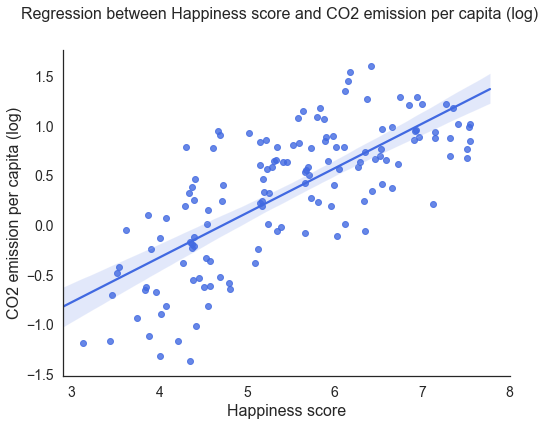

In [43]:
regplot(df, 'CO2 emission per capita (log)')

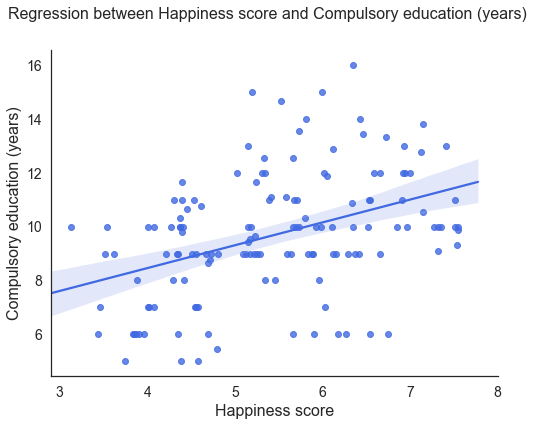

In [44]:
regplot(df, 'Compulsory education (years)')

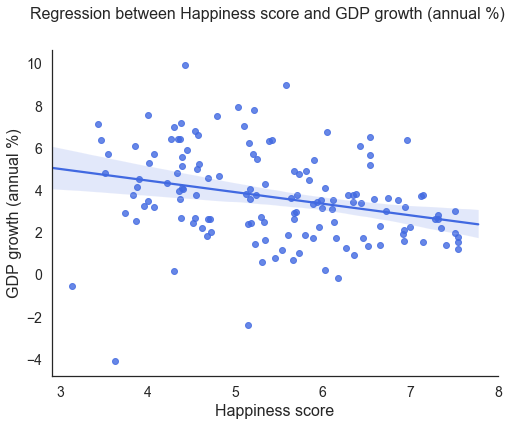

In [45]:
regplot(df, 'GDP growth (annual %)')

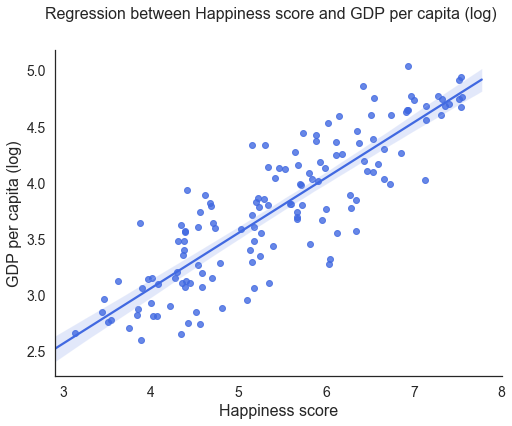

In [47]:
regplot(df, 'GDP per capita (log)')

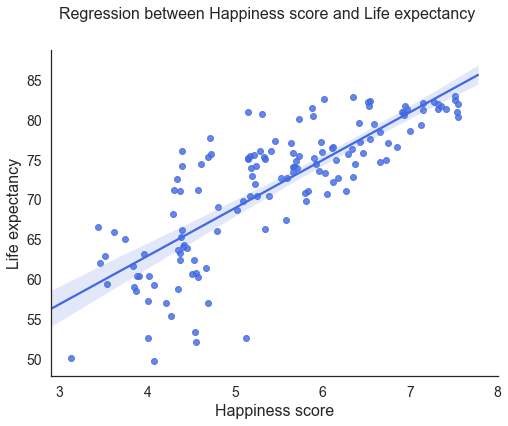

In [48]:
regplot(df, 'Life expectancy')

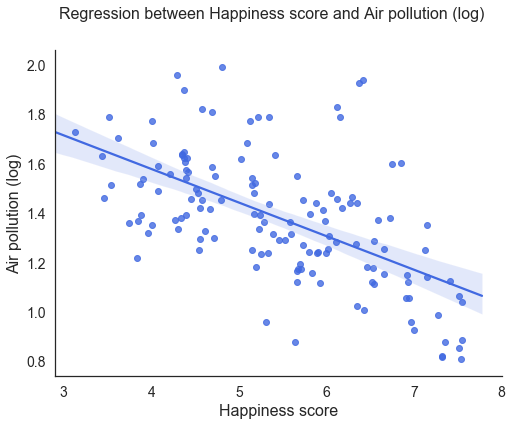

In [51]:
regplot(df, 'Air pollution (log)')

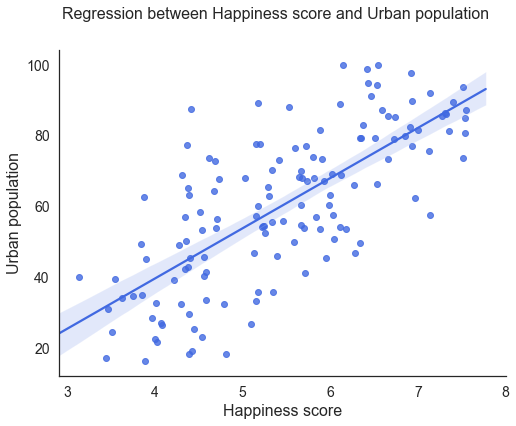

In [52]:
regplot(df, 'Urban population')

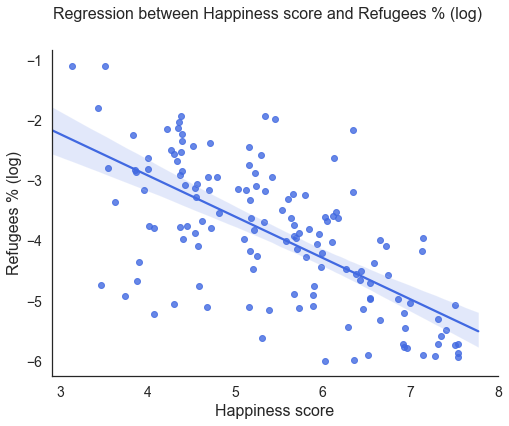

In [49]:
regplot(df, 'Refugees % (log)')

### Creating a world map of World Happiness Score

And compare with variable scores on world map

In [53]:
# import world map geodataframe. The lowres worldmap dataset from Natural Earth can be imported directly from geopandas

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.rename(columns = {'name': 'Country'}, inplace = True)
world.head()

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [54]:
world.shape

(177, 6)

In [58]:
# import merged dataframe from end of notebook 1

df2 = pd.read_csv('dfML.csv')

In [59]:
df2.shape

(161, 23)

In [61]:
# Will merge this with main df on country. First check whether country names are the samelist15 = hap15_s1['Country'].values.tolist()
list1 = df2['Country'].values.tolist()

list2 = world['Country'].values.tolist()

In [62]:
sorted(list(set(list1) - set(list2)))

['Bahrain',
 'Bosnia and Herzegovina',
 'Central African Republic',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Czech Republic',
 'Dominican Republic',
 'Hong Kong',
 'Ivory Coast',
 'Malta',
 'Mauritius',
 'Palestinian Territories',
 'Singapore',
 'South Sudan',
 'Swaziland',
 'United States']

In [63]:
sorted(list(set(list2) - set(list1)))

['Antarctica',
 'Bahamas',
 'Bosnia and Herz.',
 'Brunei',
 'Central African Rep.',
 'Congo',
 'Cuba',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Dominican Rep.',
 'Eq. Guinea',
 'Eritrea',
 'Falkland Is.',
 'Fiji',
 'Fr. S. Antarctic Lands',
 'Greenland',
 'Guinea-Bissau',
 'Guyana',
 'N. Cyprus',
 'New Caledonia',
 'North Korea',
 'Palestine',
 'Papua New Guinea',
 'S. Sudan',
 'Solomon Is.',
 'Somaliland',
 'Taiwan',
 'Timor-Leste',
 'United States of America',
 'Vanuatu',
 'W. Sahara',
 'eSwatini']

In [64]:
# replace names

world2 = world.replace({'Country': {'Bosnia and Herz.': 'Bosnia and Herzegovina', 'Central African Rep.': 'Central African Republic', 'Congo': 'Congo (Brazzaville)', 'Dem. Rep. Congo': 'Congo (Kinshasa)', 'Czechia': 'Czech Republic', 'Dominican Rep.': 'Dominican Republic', "Côte d'Ivoire": 'Ivory Coast', 'Palestine': 'Palestinian Territories', 'S. Sudan': 'South Sudan', 'eSwatini': 'Swaziland', 'United States of America': 'United States'}})


In [65]:
# create new world df without Antarctica: 

world3 = world2[world2['Country'] != 'Antarctica']

In [66]:
# join this df with the main df

dfgeo = pd.merge(world3, df2, on = 'Country', how = 'left')

In [67]:
gdf = gpd.GeoDataFrame(dfgeo, geometry = 'geometry')
gdf.head()

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry,Region,Score mean,Access to electricity (% of population),CO2 emissions (metric tons per capita),...,Population density (people per sq. km of land area),Population growth (annual %),Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of origin,"Population, total",Renewable energy consumption (% of total final energy consumption),"School enrollment, primary (gross), gender parity index (GPI)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Sub-Saharan Africa,3.4660,23.535458,0.200455,...,56.575363,2.978941,36.344444,900.666667,5.011446e+07,87.365984,1.036973,38.137051,30.920444,0.000018
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",North America,7.3506,100.000000,15.234180,...,3.897680,1.078803,25.365000,93.222222,3.544359e+07,22.181059,1.006599,9.687049,81.209556,0.000003
4,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",North America,6.9988,100.000000,16.713619,...,34.791277,0.698898,19.010000,2975.111111,3.182504e+08,8.389263,0.994702,12.985915,81.496000,0.000009


In [68]:
type(gdf['geometry'])

geopandas.geoseries.GeoSeries

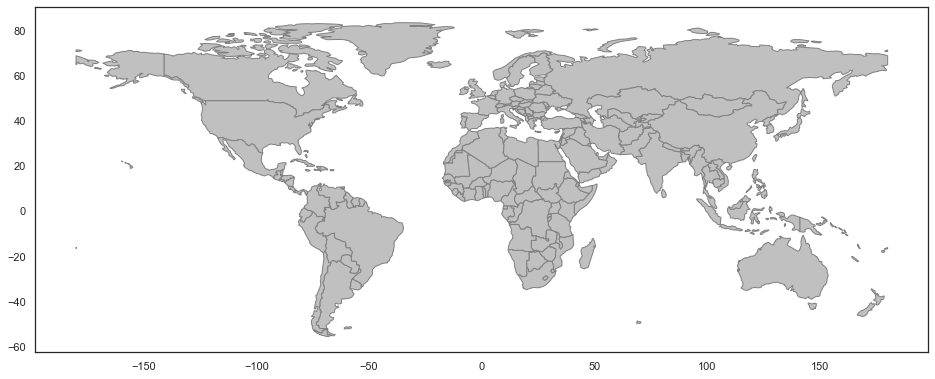

In [69]:
# Create choropleth maps of happiness score and other variables per country

# first check whether the country map data is complete
plt.rcParams['figure.figsize'] = [16,8]
gdf.plot(facecolor = 'silver', edgecolor = 'grey');

In [71]:
# Fill happiness score NaNs with zeroes
gdf['Score mean'] = gdf['Score mean'].fillna(value = 0)

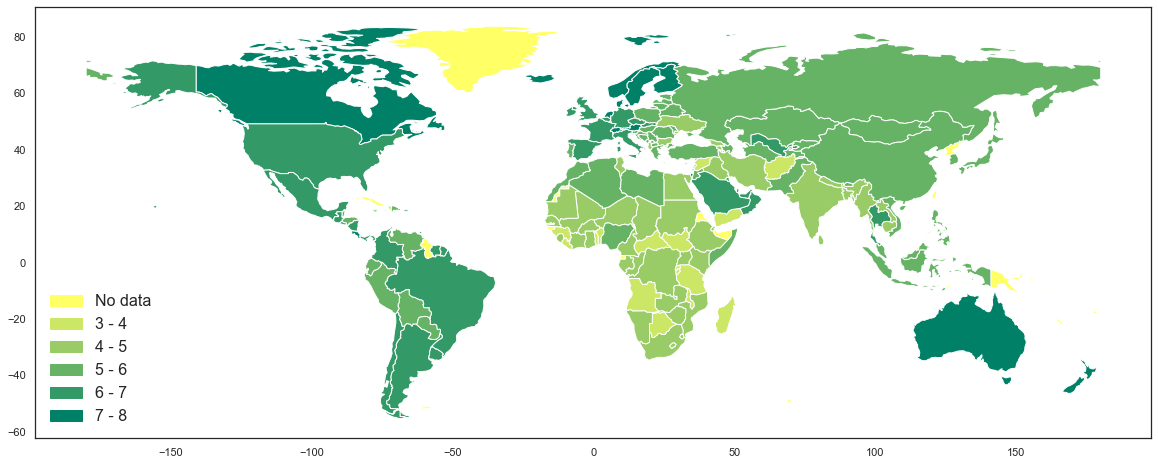

In [72]:
# plot the map with happiness scores

plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots(1, 1)

gdf.plot(column='Score mean', legend=True, ax = ax, cmap='summer_r', scheme='user_defined', classification_kwds = {'bins':[3, 4, 5, 6, 7, 8]})

cmap = cm.get_cmap('summer_r')
patch1 = mpatches.Patch(color=cmap(0.0), label = 'No data')
patch2 = mpatches.Patch(color=cmap(0.2), label = '3 - 4')
patch3 = mpatches.Patch(color=cmap(0.4), label = '4 - 5')
patch4 = mpatches.Patch(color=cmap(0.6), label = '5 - 6')
patch5 = mpatches.Patch(color=cmap(0.8), label = '6 - 7')
patch6 = mpatches.Patch(color=cmap(1.0), label = '7 - 8')

plt.legend(handles = [patch1, patch2, patch3, patch4, patch5, patch6], prop = {'size':16}, loc = 'lower left', frameon = False)

plt.show()


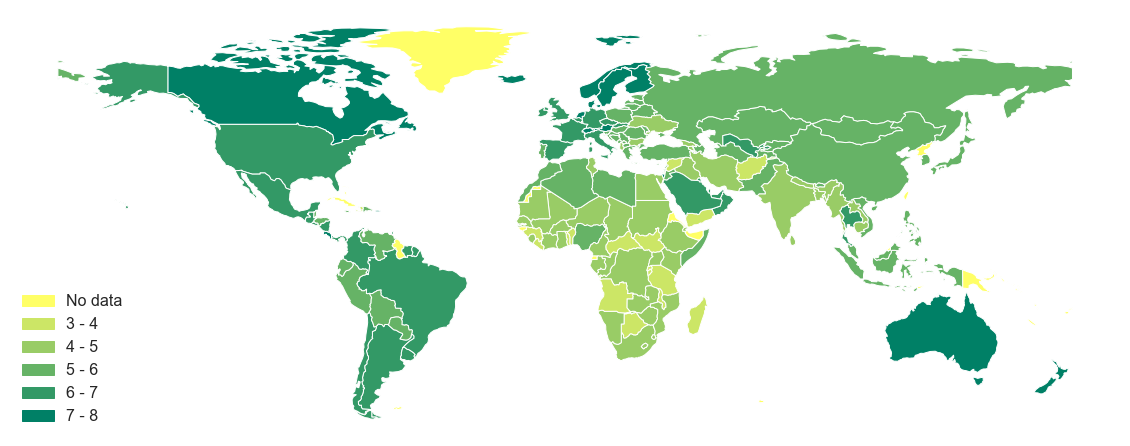

In [73]:
ax.set_axis_off()
ax.get_figure()

In [74]:
# investigate GDP per capita

gdf['GDP per capita (current US$)'].describe()


count       154.000000
mean      13773.962569
std       19725.968334
min         268.944348
25%        1468.703722
50%        5309.724699
75%       15157.632303
max      109948.677645
Name: GDP per capita (current US$), dtype: float64

In [75]:
# Fill GDP NaNs with zeroes
gdf['GDP per capita (current US$)'] = gdf['GDP per capita (current US$)'].fillna(value = 0)

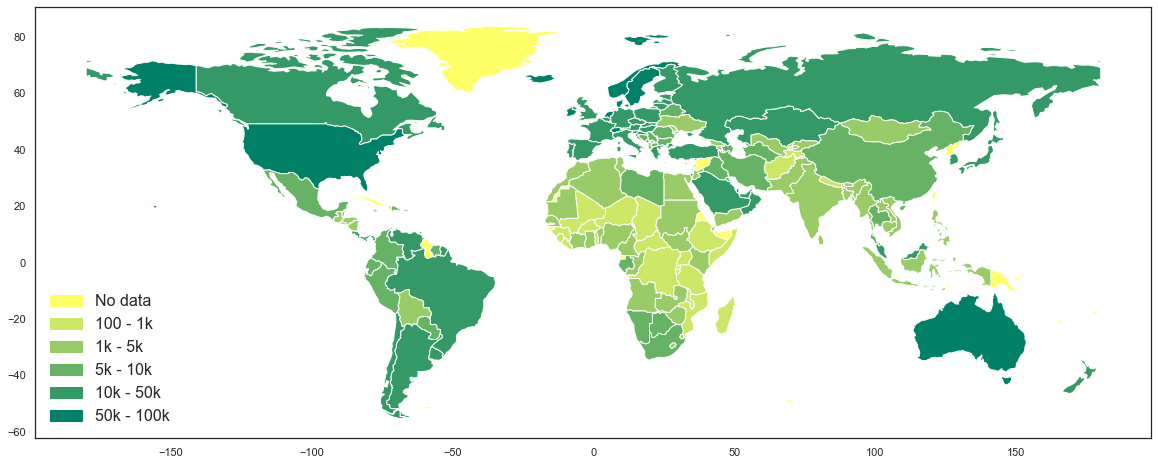

In [76]:
# plot map with GDP

plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots(1, 1)

gdf.plot(column='GDP per capita (current US$)', legend=True, ax = ax, cmap='summer_r', scheme='user_defined', classification_kwds = {'bins':[100, 1000, 5000, 10000, 50000, 200000]})

cmap = cm.get_cmap('summer_r')
patch1 = mpatches.Patch(color=cmap(0.0), label = 'No data')
patch2 = mpatches.Patch(color=cmap(0.2), label = '100 - 1k')
patch3 = mpatches.Patch(color=cmap(0.4), label = '1k - 5k')
patch4 = mpatches.Patch(color=cmap(0.6), label = '5k - 10k')
patch5 = mpatches.Patch(color=cmap(0.8), label = '10k - 50k')
patch6 = mpatches.Patch(color=cmap(1.0), label = '50k - 100k')

plt.legend(handles = [patch1, patch2, patch3, patch4, patch5, patch6], prop = {'size':16}, loc = 'lower left', frameon = False)

plt.show()

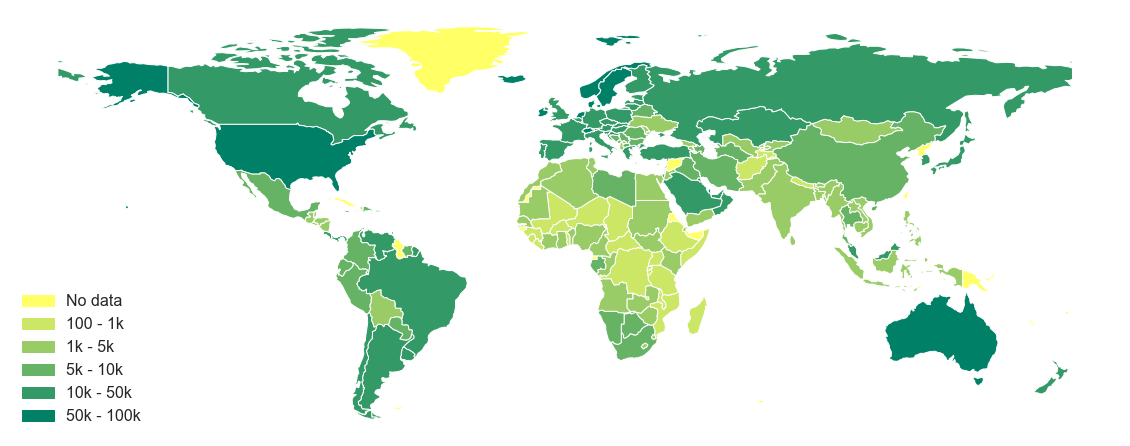

In [77]:
ax.set_axis_off()
ax.get_figure()